Files already downloaded and verified


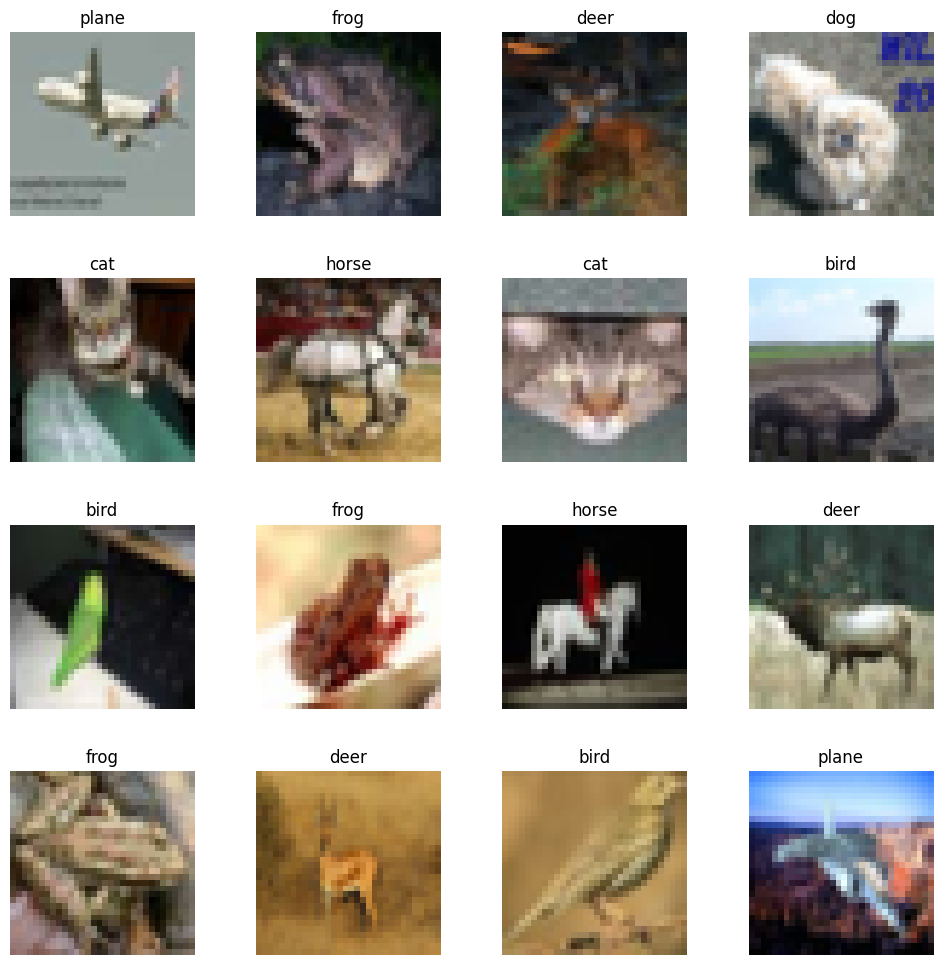

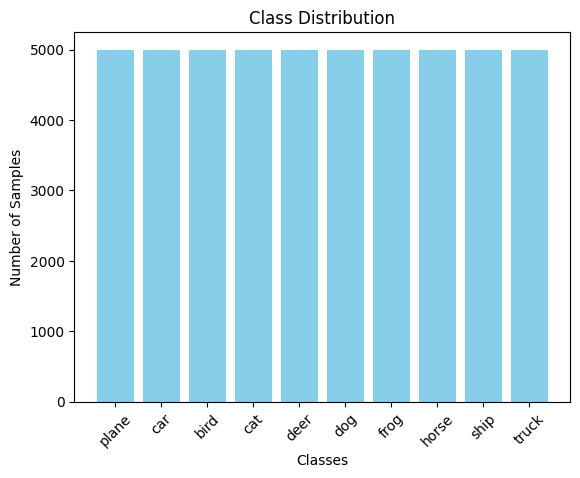

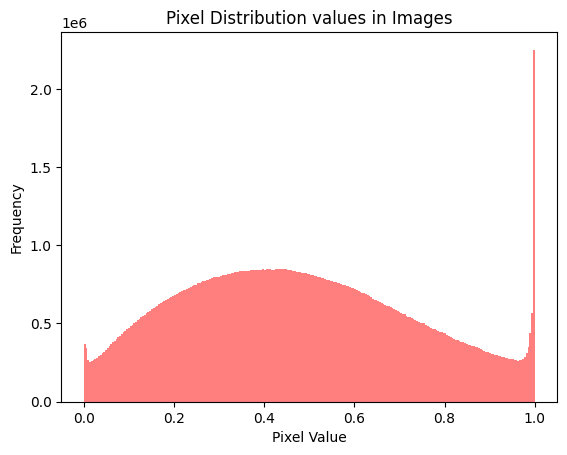

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Class labels for CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Function to display a grid of sample images
def images_display(images, labels):
    figures, axes = plt.subplots(4, 4, figsize=(10, 10))
    figures.tight_layout()

    # Iterate through each subplot in the grid
    for i, ax in enumerate(axes.flat):
        # Convert the current image to a NumPy array and transpose to HWC format
        img = np.transpose(images[i].numpy(), (1, 2, 0))
        # Display the image in the current subplot
        ax.imshow(img)

         # Hide the axes for the current subplot
        ax.set_title(classes[labels[i]])
        ax.axis('off')
    plt.show()

# Visualize a batch of images
data_iter = iter(train_loader)
images, labels = next(data_iter)
images_display(images[:16], labels[:16])

# Class distribution (train set)
def plot_class_distribution(dataset, class_names):
    # Initialize an array to store the counts of each class

    counts = np.zeros(len(class_names))

    # Iterate through the dataset and count the occurrences of each class
    for _, label in dataset:
        counts[label] += 1
    plt.bar(class_names, counts, color='skyblue')
    plt.title("Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_dataset, classes)



# Distribution of Pixel Values in Training Images
allimages = torch.cat([img.view(-1) for img, _ in train_dataset])  # Flatten and concatenate all images
plt.hist(allimages.numpy(), bins=255, color='red', alpha=0.5)
plt.title("Pixel Distribution values in Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()